### Project 2. 
**Real-time face detection- Cyber Security**

**Problem Statement:** Build an application to detect face using opencv (Dataset not required / using webcam)


In [2]:
import notebook
notebook.__version__


'6.5.4'

In [14]:
import cv2

print(cv2.__version__)


4.9.0


In [15]:
import face_recognition

print(face_recognition.__version__)

1.2.3


In [1]:
# Import necessary libraries
import cv2                         # OpenCV for computer vision tasks
import os                          # Operating System library for file and folder operations
import time                        # Time library for time-related functions
import numpy as np                 # NumPy for numerical operations
import matplotlib.pyplot as plt    # Matplotlib for plotting
import face_recognition            # Face recognition library
import seaborn as sns              # Seaborn for statistical data visualization
from matplotlib.image import imread

# Ignore warnings to avoid clutter in the output
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Matplotlib in Jupyter Notebooks
%matplotlib inline


# Taking 100 Images of the Person

Procedure to Follow:
1. Execute the face detection and image saving function.
2. Establish a directory to store the captured images.
3. Capture a total of 100 images and save them in the 'captured_images' folder.
4. Utilize the plot command to visualize all the images captured by the aforementioned code.

In [2]:
# Function to detect face and save the image
def detect_and_save_face(img, counter):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img_gray, 1.2, 4)

    for x, y, w, h in faces:
        # Draw rectangle around the face
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 6)

        # Save the face region as an image
        face_image = img[y:y+h, x:x+w]
        cv2.imwrite(f"captured_images/img_{counter:03d}.png", face_image)

        # Display the name on the image
        font = cv2.FONT_HERSHEY_DUPLEX
        name = f"img {counter}"
        cv2.putText(img, name, (x + 6, y - 6), font, 0.5, (255, 255, 255), 1)

    return img

In [4]:
# Create a directory to save the captured images
os.makedirs("captured_images", exist_ok=True)

# Real-time face detection and image capture
webcam = cv2.VideoCapture(0)
counter = 1

while counter <= 100:
    _, img = webcam.read()
    image_with_face = detect_and_save_face(img, counter)

    image_with_face = cv2.cvtColor(image_with_face, cv2.COLOR_BGR2RGB)
    cv2.imshow('Face Detection', image_with_face)

    key = cv2.waitKey(10)
    if key == 27:
        webcam.release()
        cv2.destroyAllWindows()
        break

    # Adding a delay between captures to ensure distinct captures
    #time.sleep(0.5)
    counter += 1

# Release the webcam
webcam.release()
cv2.destroyAllWindows()


No. of Images captured by Webcam :  100


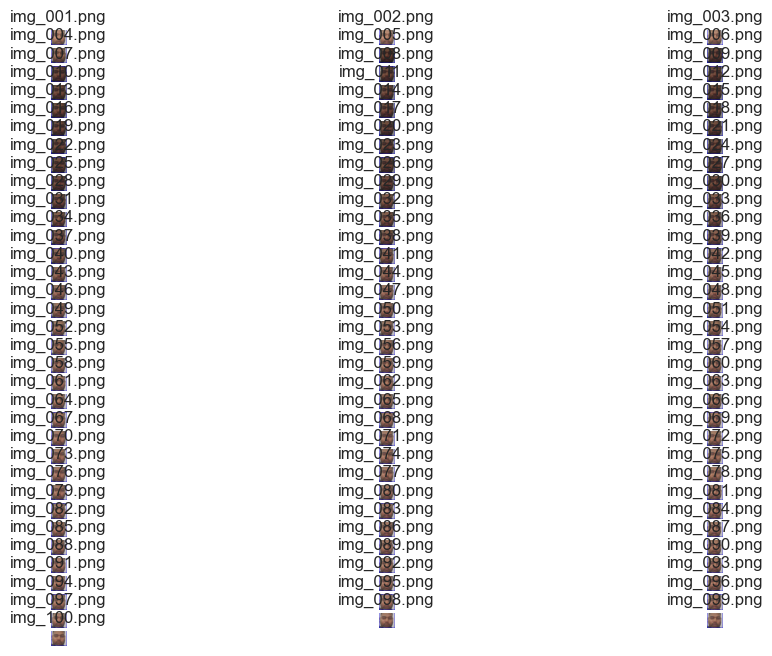

In [5]:
# Set the path to the folder containing images
folder_path = "captured_images"

# Get the list of image file names in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Count the number of images in the folder
num_images = len(image_files)

# Get the list of image file names in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Calculate the grid size based on the number of images
num_images = len(image_files)
num_columns = 3  # Set the desired number of columns
num_rows = (num_images + num_columns - 1) // num_columns

# Create a Seaborn grid for displaying images
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

#Printing the the number of image available in Folder
print('No. of Images captured by Webcam : ', num_images)

# Loop through each image file and display it in the Seaborn grid
for i, image_file in enumerate(image_files):
    img_path = os.path.join(folder_path, image_file)
    img = imread(img_path)

    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()


## Enrolling the Person:

### Procedure to Follow:

1. Execute the function to save a face image with the provided name.
1. Execute the function to recognize and display faces in the webcam feed.
1. Run the main code.
1. Enter the person's name and press Enter.
1. Press the **`Space Bar`** button to capture a picture.
1. Press the Double **`Esc or 'qq'`** button to exit.

In [6]:
# Function to save face image with the given name
def save_face_image(face_image, name):
    folder_path = "images"
    os.makedirs(folder_path, exist_ok=True)
    file_path = os.path.join(folder_path, f"{name}.png")
    cv2.imwrite(file_path, face_image)
    print(f"Face image for {name} saved as {file_path}")

In [7]:
# Function to recognize and display the face in the webcam feed
def recognize_faces(webcam):
    # Get the name of the person
    name = input("Enter the name of the person: ")

    capturing = False  # Flag to indicate whether capturing is active

    while True:
        _, img = webcam.read()
        face_locations = face_recognition.face_locations(img)
        face_encodings = face_recognition.face_encodings(img, face_locations)

        for face_encoding, (top, right, bottom, left) in zip(face_encodings, face_locations):
            # Draw a rectangle around the face
            cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)

            # Check if the space key is pressed to start capturing
            key = cv2.waitKey(10)
            if key == 32:  # Space key
                capturing = True

            # If capturing is active, save the face image and stop capturing
            if capturing:
                face_image = img[top:bottom, left:right]
                save_face_image(face_image, name)
                capturing = False

        # Display the resulting frame with message
        message = "Press Space for Capture | Press Doubble Esc or qq for Quit"
        cv2.putText(img, message, (10, img.shape[0] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        cv2.imshow('Face Recognition', img)

        key = cv2.waitKey(10)
        if key == 27 or key == ord('q'):  # Doubble Esc key or 'qq'
            webcam.release()
            cv2.destroyAllWindows()
            break

In [8]:
# Main program
webcam = cv2.VideoCapture(0)
recognize_faces(webcam)

Enter the name of the person: Anuj Pratap
Face image for Anuj Pratap saved as images\Anuj Pratap.png


## Number of Person Enrolled  

No. of Person Enrolled :  1


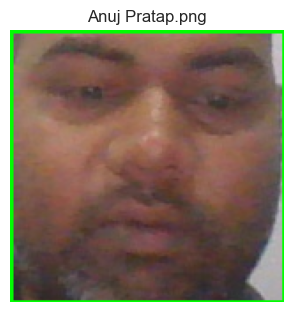

In [9]:
# Set the path to the folder containing images
folder_path = "images"

# Get the list of image file names in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Count the number of images in the folder
num_images = len(image_files)

# Get the list of image file names in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Calculate the grid size based on the number of images
num_images = len(image_files)
num_columns = 3  # Set the desired number of columns
num_rows = (num_images + num_columns - 1) // num_columns

# Create a Seaborn grid for displaying images
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

#Printing the the number of image available in Folder
print('No. of Person Enrolled : ', num_images)

# Loop through each image file and display it in the Seaborn grid
for i, image_file in enumerate(image_files):
    img_path = os.path.join(folder_path, image_file)
    img = imread(img_path)

    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()


### Detecting Face via webcam:

**Procedure to Follow for Webcam Face Detection:**

1. Execute the function to load known face encodings and names.
1. Execute the function to recognize and display faces in the webcam feed.
1. Run the main code.

After these steps, you will be able to observe the enrolled individuals through the webcam. Unenrolled individuals will be labeled as "`Unknown`."

In [10]:
# Function to load known face encodings and names
def load_known_faces(folder_path):
    known_encodings = []
    known_names = []

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            img = face_recognition.load_image_file(image_path)
            
            # Check if any face is detected
            face_encodings = face_recognition.face_encodings(img)
            if len(face_encodings) > 0:
                encoding = face_encodings[0]
                known_encodings.append(encoding)
                known_names.append(os.path.splitext(filename)[0])

    return known_encodings, known_names

In [11]:
# Function to recognize and display the face in the webcam feed
def recognize_faces(webcam, known_encodings, known_names):
    while True:
        _, img = webcam.read()
        face_locations = face_recognition.face_locations(img)
        face_encodings = face_recognition.face_encodings(img, face_locations)

        for face_encoding, (top, right, bottom, left) in zip(face_encodings, face_locations):
            # Check if the face matches any known face
            matches = face_recognition.compare_faces(known_encodings, face_encoding)
            name = "Unknown"
            accuracy = 0

            # If a match is found, use the name associated with the first match
            if True in matches:
                first_match_index = matches.index(True)
                name = known_names[first_match_index]

                # Calculate face match accuracy percentage
                face_distances = face_recognition.face_distance(known_encodings, face_encoding)
                accuracy = (1 - face_distances[first_match_index]) * 100

            # Draw a rectangle around the face
            cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)

            # Display accuracy at the top center of the bounding box
            font = cv2.FONT_HERSHEY_DUPLEX
            accuracy_label = f"{accuracy:.2f}%"
            accuracy_label_size = cv2.getTextSize(accuracy_label, font, 0.5, 1)[0]
            accuracy_label_position = ((left + right - accuracy_label_size[0]) // 2, top - 10)
            cv2.putText(img, accuracy_label, accuracy_label_position, font, 0.5, (255, 255, 255), 1)

            # Display name slightly higher than the bottom center of the bounding box
            name_label_size = cv2.getTextSize(name, font, 0.5, 1)[0]
            name_label_position = ((left + right - name_label_size[0]) // 2, bottom - 10)
            cv2.putText(img, name, name_label_position, font, 0.5, (255, 255, 255), 1)

        # Display the resulting frame with message
        message = "Press Esc to Quit"
        cv2.putText(img, message, (10, img.shape[0] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        cv2.imshow('Face Recognition', img)

        key = cv2.waitKey(10)
        if key == 27:
            webcam.release()
            cv2.destroyAllWindows()
            break

In [12]:
# Main program
known_folder_path = "images"
known_encodings, known_names = load_known_faces(known_folder_path)

webcam = cv2.VideoCapture(0)
recognize_faces(webcam, known_encodings, known_names)


**In summary, the code facilitates webcam face detection through the following steps:**

1. Load known face encodings and names.
1. Recognize and display faces in real-time via the webcam.
1. Run the main code for comprehensive face detection.

The system captures and identifies enrolled individuals, labeling others as "Unknown." The code employs essential libraries, including OpenCV, Matplotlib, Face Recognition, and Seaborn, optimizing the face detection process.